In [7]:
import json
import numpy as np
from collections import Counter
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

from adjustText import adjust_text

In [39]:
[party for party in countries if "Democratic" in party["name"]]

[{'id': 'Democratic_Unionist_Party',
  'name': 'Democratic Unionist Party',
  'ideology': ['British unionism',
   'British nationalism',
   'National conservatism',
   'Social conservatism',
   'Right-wing populism',
   'Euroscepticism'],
  'colors': ['#d46a4c', '#24303b', '#db151d']},
 {'id': 'Social_Democratic_and_Labour_Party',
  'name': 'Social Democratic and Labour Party',
  'ideology': ['Social democracy', 'Irish nationalism'],
  'colors': ['#2aa82c']},
 {'id': 'British_Democratic_Party_(2013)',
  'name': 'British Democratic Party',
  'ideology': ['Ultranationalism',
   'Euroscepticism',
   'Souverainism',
   'Right-wing populism',
   'British unionism'],
  'colors': ['#1c1cf0']},
 {'id': 'Scottish_Democratic_Alliance',
  'name': 'Scottish Democratic Alliance',
  'ideology': ['Scottish independence', 'Hard Euroscepticism'],
  'colors': ['#996aa0']},
 {'id': 'Social_Democratic_Party_(UK,_1990%E2%80%93present)',
  'name': 'Social Democratic Party',
  'ideology': ['Social democracy'

In [70]:
d1 = {"A":"B"}
d2 = {"1":2}
dict(d1, **d2)

{'A': 'B', '1': 2}

In [56]:
with open("data/united_kingdom.json", "r") as fin:
    uk = json.loads(fin.readline())
    
with open("data/united_states.json", "r") as fin:
    us = json.loads(fin.readline())
    
with open("data/germany.json", "r") as fin:
    germany = json.loads(fin.readline())

countries = [dict(party, *{"country":}) for party in (uk+us+germany) if len(party['colors']) > 0 and len(party['ideology'])]

ideologies = Counter(sum([party['ideology'] for party in countries],[]))
ideologies = [k for k, v in ideologies.most_common() if v > 1]
mapping = dict(zip(ideologies, range(len(ideologies))))

party_vectors = []
party_names = []
party_colors = []

for party in countries:
    idx = [mapping[ideology] for ideology in party['ideology'] if ideology in mapping]
    vec = np.zeros(len(mapping))
    vec[idx] = 1
    if (len(idx) > 1 and party["name"] not in party_names):
        party_vectors.append(vec)
        party_names.append(party["name"])
        party_colors.append(party["colors"][0])

In [50]:
"Democratic Party" in party_names

True

In [57]:
party_names

['Conservative and Unionist Party',
 'Labour Party',
 'Whigs',
 'Tories',
 'Liberal Party',
 'Liberal Unionist Party',
 'Liberal Democrats',
 'Scottish National Party',
 'UK Independence Party',
 'Green Party of England and Wales',
 'Plaid Cymru – the Party of Wales',
 'The Co-operative Party',
 'Democratic Unionist Party',
 'Sinn Féin',
 'Social Democratic and Labour Party',
 'Alba Party',
 'Alliance Party of Northern Ireland',
 'Ulster Unionist Party',
 'Scottish Green Party',
 'Green Party Northern Ireland',
 'Traditional Unionist Voice',
 'People Before Profit',
 'Residents for Guildford and Villages',
 'Propel',
 'Our West Lancashire',
 'Mebyon Kernow',
 'Progressive Unionist Party',
 'Reform UK',
 'The North East Party',
 'Independent Union',
 'Aontú',
 'Orkney Manifesto Group',
 'The For Britain Movement',
 'The Rubbish Party',
 'Militant Left',
 'Official Monster Raving Loony Party',
 'Gwlad',
 "Women's Equality Party",
 'Trade Unionist and Socialist Coalition',
 "Alliance EPP:

In [58]:
X = np.vstack(list(party_vectors))
embedding = TSNE(n_components=2).fit_transform(X)
print(embedding)

[[  8.655698     0.09347704]
 [-10.8215475    0.249955  ]
 [ -8.581273   -10.58416   ]
 [ 11.944935    -1.0609843 ]
 [ -8.214748   -11.785563  ]
 [ -8.488017    -8.562     ]
 [ -6.717411   -12.841819  ]
 [-10.334281    -5.930605  ]
 [  8.573651    12.058141  ]
 [ -0.7896997  -11.918585  ]
 [-14.015281    -2.6992738 ]
 [-10.31335     -3.0541155 ]
 [  9.592611    11.2714815 ]
 [-10.21361      4.924542  ]
 [ -7.839899    -4.4105945 ]
 [ -5.090297     5.409359  ]
 [ -5.024022   -11.209033  ]
 [  9.947235    -0.49229607]
 [ -8.242461     7.914973  ]
 [ -2.8099039  -11.530348  ]
 [ 10.724656     9.496825  ]
 [ -3.384698    11.375341  ]
 [  2.74673      0.25216055]
 [  4.451198     2.0908787 ]
 [  2.799102    -1.1025052 ]
 [-13.520054    -4.182782  ]
 [ -9.893979    -1.0086179 ]
 [  5.3185315    6.350667  ]
 [  5.6947927   -9.785599  ]
 [  3.7618384    5.009188  ]
 [  3.7495542   12.243444  ]
 [  1.4144757   -0.98042077]
 [  8.662986    14.0115795 ]
 [  0.86397064   0.8379672 ]
 [ -8.908539  

In [60]:
include_labels = ['Conservative and Unionist Party', 'Labour Party', 'Liberal Democrats', 'Scottish National Party', 'Green Party of England and Wales', 'The Co-operative Party', 'Democratic Unionist Party', 'UK Independence Party', 'British National Party','Alba Party', 'Scottish Green Party', 'Sinn Féin', 'Traditional Unionist Voice', 'Ulster Unionist Party', 'Alliance Party of Northern Ireland', 'Social Democratic and Labour Party', 'Reform UK', 'Mebyon Kernow', 'Christian Party', 'Communist Party of Britain', "Democratic Party", "Republican Party", "Libertarian Party", "Green Party of the United States", 'Black Panther Party', 'Social Democratic Party of Germany', 'Christian Democratic Union of Germany', 'Christian Social Union in Bavaria', 'CDU/CSU', 'Alliance 90/The Greens', 'The Left', 'Alternative for Germany']

In [59]:
party_names

['Conservative and Unionist Party',
 'Labour Party',
 'Whigs',
 'Tories',
 'Liberal Party',
 'Liberal Unionist Party',
 'Liberal Democrats',
 'Scottish National Party',
 'UK Independence Party',
 'Green Party of England and Wales',
 'Plaid Cymru – the Party of Wales',
 'The Co-operative Party',
 'Democratic Unionist Party',
 'Sinn Féin',
 'Social Democratic and Labour Party',
 'Alba Party',
 'Alliance Party of Northern Ireland',
 'Ulster Unionist Party',
 'Scottish Green Party',
 'Green Party Northern Ireland',
 'Traditional Unionist Voice',
 'People Before Profit',
 'Residents for Guildford and Villages',
 'Propel',
 'Our West Lancashire',
 'Mebyon Kernow',
 'Progressive Unionist Party',
 'Reform UK',
 'The North East Party',
 'Independent Union',
 'Aontú',
 'Orkney Manifesto Group',
 'The For Britain Movement',
 'The Rubbish Party',
 'Militant Left',
 'Official Monster Raving Loony Party',
 'Gwlad',
 "Women's Equality Party",
 'Trade Unionist and Socialist Coalition',
 "Alliance EPP:

In [53]:
party_names

['Conservative and Unionist Party',
 'Labour Party',
 'Whigs',
 'Tories',
 'Liberal Party',
 'Liberal Unionist Party',
 'Liberal Democrats',
 'Scottish National Party',
 'UK Independence Party',
 'Green Party of England and Wales',
 'Plaid Cymru – the Party of Wales',
 'The Co-operative Party',
 'Democratic Unionist Party',
 'Sinn Féin',
 'Social Democratic and Labour Party',
 'Alba Party',
 'Alliance Party of Northern Ireland',
 'Ulster Unionist Party',
 'Scottish Green Party',
 'Green Party Northern Ireland',
 'Traditional Unionist Voice',
 'People Before Profit',
 'Residents for Guildford and Villages',
 'Propel',
 'Our West Lancashire',
 'Mebyon Kernow',
 'Progressive Unionist Party',
 'Reform UK',
 'The North East Party',
 'Independent Union',
 'Aontú',
 'Orkney Manifesto Group',
 'The For Britain Movement',
 'The Rubbish Party',
 'Militant Left',
 'Official Monster Raving Loony Party',
 'Gwlad',
 "Women's Equality Party",
 'Trade Unionist and Socialist Coalition',
 "Alliance EPP:

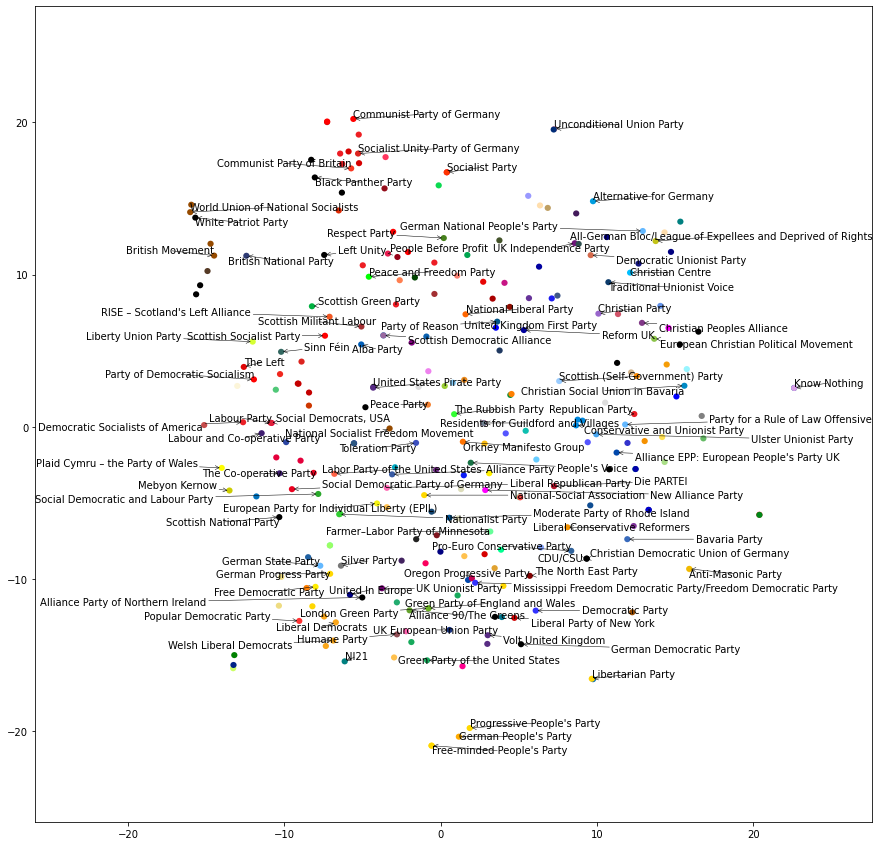

In [61]:
import random

patches = []
colors  = []

fig, ax = plt.subplots(figsize=(15,15))

for i in range(len(embedding)):
    C = Circle(tuple(embedding[i]), .2, edgecolor='k')
    patches.append(C)
    colors.append(party_colors[i])
    
texts = []
xs = []
ys = []
for i in range(len(embedding)):
    if random.randint(1,3) == 3 or party_names[i] in include_labels:
        texts.append(plt.text(*embedding[i], party_names[i], horizontalalignment='center', verticalalignment='center'))

#plt.axis('equal')
ax.set_xlim(np.min(embedding)-5,np.max(embedding)+5)
ax.set_ylim(np.min(embedding)-5,np.max(embedding)+5)

collection = PatchCollection(patches)
collection.set_facecolor(colors)
ax.add_collection(collection)
adjust_text(texts, xs, ys, arrowprops=dict(arrowstyle="->", color='k', lw=0.5), only_move={'points':'y', 'text':'x'})
plt.savefig("parties_us_uk.png", dpi=600)
plt.show()

In [ ]:
[name for name in count]

In [62]:
countries

[{'id': 'Conservative_Party_(UK)',
  'name': 'Conservative and Unionist Party',
  'ideology': ['Conservatism', 'Economic liberalism', 'British unionism'],
  'colors': ['#0087dc']},
 {'id': 'Labour_Party_(UK)',
  'name': 'Labour Party',
  'ideology': ['Social democracy', 'Democratic socialism'],
  'colors': ['#e4003b']},
 {'id': 'British_Whig_Party',
  'name': 'Whigs',
  'ideology': ['Liberalism', 'Classical liberalism', 'Whiggism'],
  'colors': ['#ff7f00']},
 {'id': 'British_Tory_Party',
  'name': 'Tories',
  'ideology': ['Conservatism', 'Toryism'],
  'colors': ['#3333cc']},
 {'id': 'Liberal_Party_(UK)',
  'name': 'Liberal Party',
  'ideology': ['Liberalism', 'Classical liberalism', 'Social liberalism'],
  'colors': ['#ffd700', '#ff7f00']},
 {'id': 'Liberal_Unionist_Party',
  'name': 'Liberal Unionist Party',
  'ideology': ['Liberalism', 'British unionism'],
  'colors': ['#2061a2']},
 {'id': 'Liberal_Democrats_(UK)',
  'name': 'Liberal Democrats',
  'ideology': ['Liberalism', 'Social l